<a href="https://colab.research.google.com/github/FrancoGalfrascoli/CSE---437-/blob/main/lab1_bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Multi-armed Bandits

This lab explores the multi-armed bandit problem, where an agent must choose among multiple options (arms) with unknown reward distributions to maximize its cumulative reward over time.

In [ ]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Number of bandit arms
K = 5 # @param {"type":"integer"}
# Number of trials (time steps)
T = 100  # @param {"type":"integer"}

# Random seed
seed = 0

Text(0.5, 1.02, 'Unknown Reward Distributions for K Bandits')

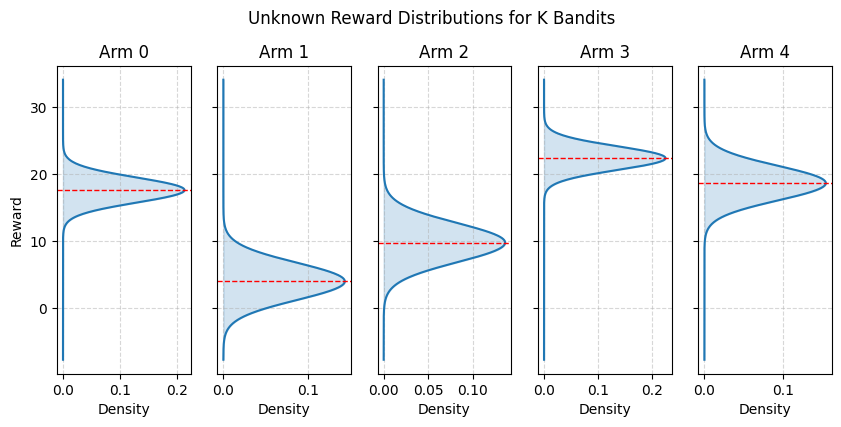

In [ ]:
# Stattionary probability distribution for K bandits
np.random.seed(seed)
bandit_mean = 10 * np.random.normal(size=K)
bandit_std = np.random.uniform(1, 3, size=K)




###### Plot disttributions #######
fig, axes = plt.subplots(1, K, figsize=(2*K, 4), sharey=True)

x_min = bandit_mean.min() - 4 * bandit_std.max()
x_max = bandit_mean.max() + 4 * bandit_std.max()
x = np.linspace(x_min, x_max, 500)

for i, ax in enumerate(axes):
    y = norm.pdf(x, loc=bandit_mean[i], scale=bandit_std[i])
    ax.plot(y, x, color="C0")  # vertical orientation
    ax.fill_betweenx(x, 0, y, alpha=0.2, color="C0")
    ax.axhline(bandit_mean[i], color="r", linestyle="--", linewidth=1)  # mean
    ax.set_title(f"Arm {i}")
    ax.set_xlabel("Density")
    if i == 0:
        ax.set_ylabel("Reward")
    ax.grid(True, linestyle="--", alpha=0.5)
plt.suptitle("Unknown Reward Distributions for K Bandits", y=1.02)


Text(0, 0.5, 'Reward')

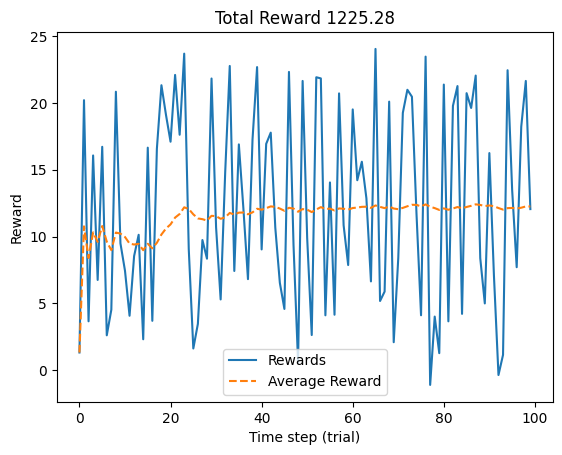

In [ ]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = np.random.randint(0, K-1)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")




## Exercise 1: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. The total reward should be higher than the

Text(0, 0.5, 'Reward')

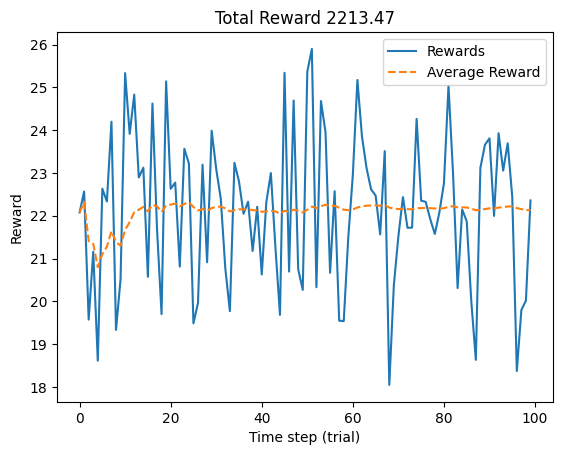

In [ ]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = 3 # Using arm 3 gives me higher reward than randomly choosing

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

## Exercise 2: Greedy strategy


1. Implement the greedy strategy: Always choose the arm with the highest estimated average reward.

2. Implement the Epsilon-greedy strategy: with a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.

3. [Optional for 337] Implement Thompson Sampling: Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.



Text(0, 0.5, 'Reward')

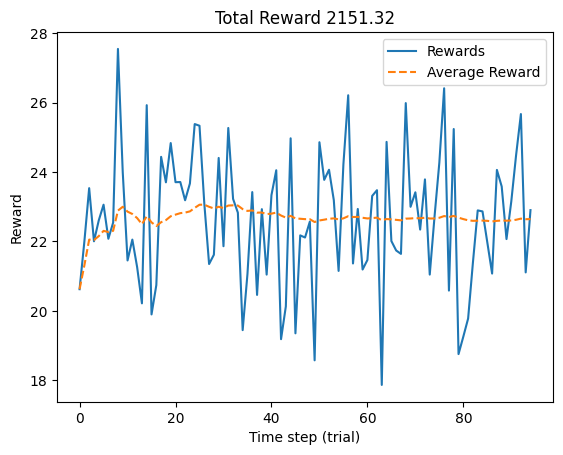

In [ ]:
# Rewards
reward = []
avg_rewards = []
rewards = []
action = np.ones(K)

# For T trials, chose a random arm
# We select each of the arms one time
for t in range(K):
  # Action: Choose a random arm
  a = t

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])

  rewards.append(r)
  avg_rewards.append(rewards[a])

# For T trials, chose a random arm
for t in range(K,T):
  # Action: Choose a random arm
  a = np.argmax(avg_rewards)

  # print(f"a: {a}") # Print to debug
  action[a] += 1

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  reward.append(r)

  avg_rewards[a] = rewards[a] + (r - rewards[a])/action[a]
  # print(f"avg_rewards: {avg_rewards}") # Print to debug

# Total reward
total = sum(reward)
avg_reward = np.cumsum(reward) / np.arange(1, len(reward) + 1)

# Plot results
plot(reward, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

Text(0, 0.5, 'Reward')

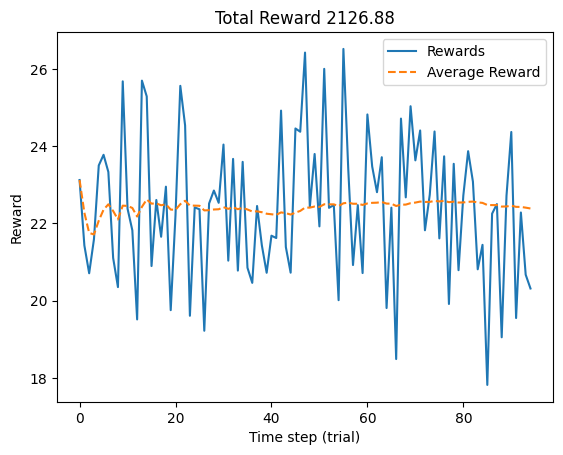

In [ ]:
# epsilon-greedy

# Rewards
reward = []
avg_rewards = []
rewards = []
action = np.ones(K)
epsilon = 0.001

# For T trials, chose a random arm
# We select each of the arms one time
for t in range(K):
  # Action: Choose a random arm
  a = t

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])

  rewards.append(r)
  avg_rewards.append(rewards[a])

# For T trials, chose a random arm
for t in range(K,T):

  check_value = np.random.rand()

  if check_value < epsilon:
    a = np.random.randint(0, K)
  else:
    a = np.argmax(avg_rewards)

  # print(f"a: {a}") # Print to debug
  action[a] += 1

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  reward.append(r)

  avg_rewards[a] = rewards[a] + (r - rewards[a])/action[a]
  # print(f"avg_rewards: {avg_rewards}") # Print to debug

# Total reward
total = sum(reward)
avg_reward = np.cumsum(reward) / np.arange(1, len(reward) + 1)

# Plot results
plot(reward, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

# Questions
After compleing the excercises, answer the following questions:

1. In the epsilon-greedy strategy, compare ε = 0.1 and ε = 0.001. What are the advantages of using a larger ε?
2. If the reward distribution changes smoothly over time, is a purely greedy strategy still effective?
3. How does the choice of ε affect the balance between exploration and exploitation in the long run?  
4. Suppose the number of arms increases significantly. How might this change the effectiveness of the epsilon-greedy strategy?  

1. Using a larger ε allows for more exploration. Citing the reinfocement learning book: 'The ε = 0.1 method explores more, and usually finds the optimal action earlier, but never selects it more than 91% of the time. The ε = 0.001 method improves more slowly, but eventually performs better than the ε = 0.1 method on both performance measures.'

2. No. Again from the book: 'For example, suppose the bandit task were nonstationary, that is, that the true values of the actions changed over time. In this case exploration is needed even in the deterministic case to make sure one of the nongreedy actions has not changed to become better than the greedy one.' In other words, without exploration it is impossible to know which is the best action if they change over time. The purely greedy strategy might be stuck with a non-optimal reward.

3. In the long run, Qₜ(A) should converge to q(A). Therefore, a bigger value of ε becomes ineffecitve, since the best action (greedy) is selected fewer times. (Explained in 1.)

4. If the number of arms increases significantly, the code would need a lot of actions to explore the whole domain. Also, if the value of ε is small, that would make it even harder for an specific action to be selected.